In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [326]:
df = pd.read_csv("flats.csv", sep=",")

In [327]:
df.columns

Index(['Unnamed: 0', 'animals', 'common_cost', 'condition', 'date_scraped',
       'description', 'elevator', 'energy_certificate', 'furniture', 'garden',
       'heating_type', 'image_folder_name', 'image_urls', 'location',
       'location_str', 'price', 'rooms', 'size', 'title', 'type', 'url',
       'view_type'],
      dtype='object')

In [328]:
print(f"Az elso 5 elem:")
df.head(2)

Az elso 5 elem:


,Unnamed: 0,animals,common_cost,condition,date_scraped,description,elevator,energy_certificate,furniture,garden,...,image_urls,location,location_str,price,rooms,size,title,type,url,view_type
0,https://ingatlan.jofogas.hu/budapest/07_01_tol...,nem,15000 ft/hó,új építésű,2018/05/06 14:50,Újnak LÁtszÓ (a valóságban 7 éves) BelvÁrosi...,van,a,igen,nem,...,['https://img.jofogas.hu/hdimages/07_01_tol_be...,"(47.5101199, 19.0936737)","Budapest, XIV. kerület, Istvánmező, Thököly...",148000.0,2.0,60.0,"07.01-től belvárosi, 2 szobás berendezett laká...",tégla,https://ingatlan.jofogas.hu/budapest/07_01_tol...,panoráma
1,https://ingatlan.jofogas.hu/budapest/100m2__es...,nem,NaN,felújított,2018/05/06 15:30,Kertvárosi környezetben 4 lakásos társasházb...,nincs,NaN,megegyezés szerint,igen,...,['https://img.jofogas.hu/hdimages/100m2__es_2_...,"(47.5498939, 19.1262642)","Budapest, XV. kerület, Rákospalota, Dessewf...",170000.0,2.0,100.0,"100m2 -es 2,5 szobás lakás Rákospalotán kiadó",tégla,https://ingatlan.jofogas.hu/budapest/100m2__es...,udvari


In [329]:
df["condition"].iloc[0]

'új építésű'

In [330]:
df.describe

<bound method NDFrame.describe of                                              Unnamed: 0  \
0     https://ingatlan.jofogas.hu/budapest/07_01_tol...   
1     https://ingatlan.jofogas.hu/budapest/100m2__es...   
2     https://ingatlan.jofogas.hu/budapest/106_nm_es...   
3     https://ingatlan.jofogas.hu/budapest/106_nm_es...   
4     https://ingatlan.jofogas.hu/budapest/106_nm_es...   
...                                                 ...   
2839  https://ingatlan.jofogas.hu/budapest/____IRODA...   
2840  https://ingatlan.jofogas.hu/budapest/____NAGYO...   
2841  https://ingatlan.jofogas.hu/budapest/___rOzsad...   
2842  https://ingatlan.jofogas.hu/budapest/studio_la...   
2843  https://ingatlan.jofogas.hu/budapest/ujszeru__...   

                             animals   common_cost    condition  \
0                                nem  15000  ft/hó   új építésű   
1                                nem           NaN   felújított   
2                                NaN           NaN  jó á

In [331]:
df.isnull().sum()

Unnamed: 0               0
animals                607
common_cost            979
condition               83
date_scraped             0
description              0
elevator                 4
energy_certificate    2300
furniture               99
garden                1383
heating_type             4
image_folder_name      116
image_urls               0
location                 0
location_str             0
price                   32
rooms                    1
size                     1
title                    0
type                     6
url                      0
view_type              268
dtype: int64

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2844 non-null   object 
 1   animals             2237 non-null   object 
 2   common_cost         1865 non-null   object 
 3   condition           2761 non-null   object 
 4   date_scraped        2844 non-null   object 
 5   description         2844 non-null   object 
 6   elevator            2840 non-null   object 
 7   energy_certificate  544 non-null    object 
 8   furniture           2745 non-null   object 
 9   garden              1461 non-null   object 
 10  heating_type        2840 non-null   object 
 11  image_folder_name   2728 non-null   object 
 12  image_urls          2844 non-null   object 
 13  location            2844 non-null   object 
 14  location_str        2844 non-null   object 
 15  price               2812 non-null   float64
 16  rooms 

In [333]:
df_clean = df.copy()
df_clean = df_clean.dropna(subset=["price", "size", "rooms","heating_type", "elevator", "type"])
df_clean["common_cost"] = df_clean["common_cost"].str.replace(r'\D', '', regex=True)
df_clean.isnull().sum()

df_clean["common_cost"] = pd.to_numeric(df_clean["common_cost"], errors="coerce")

print("Közös költség típusa:", df_clean["common_cost"].dtype)
print("Hiányzó értékek száma a konvertálás után:", df_clean["common_cost"].isnull().sum())

Közös költség típusa: float64
Hiányzó értékek száma a konvertálás után: 952


427     136377450.0
2202     65000000.0
2105     61900000.0
583      58800000.0
2386     45000000.0
           ...     
2005        15000.0
2302        10000.0
2402         8000.0
2044         1500.0
2002          120.0
Name: price, Length: 2800, dtype: float64


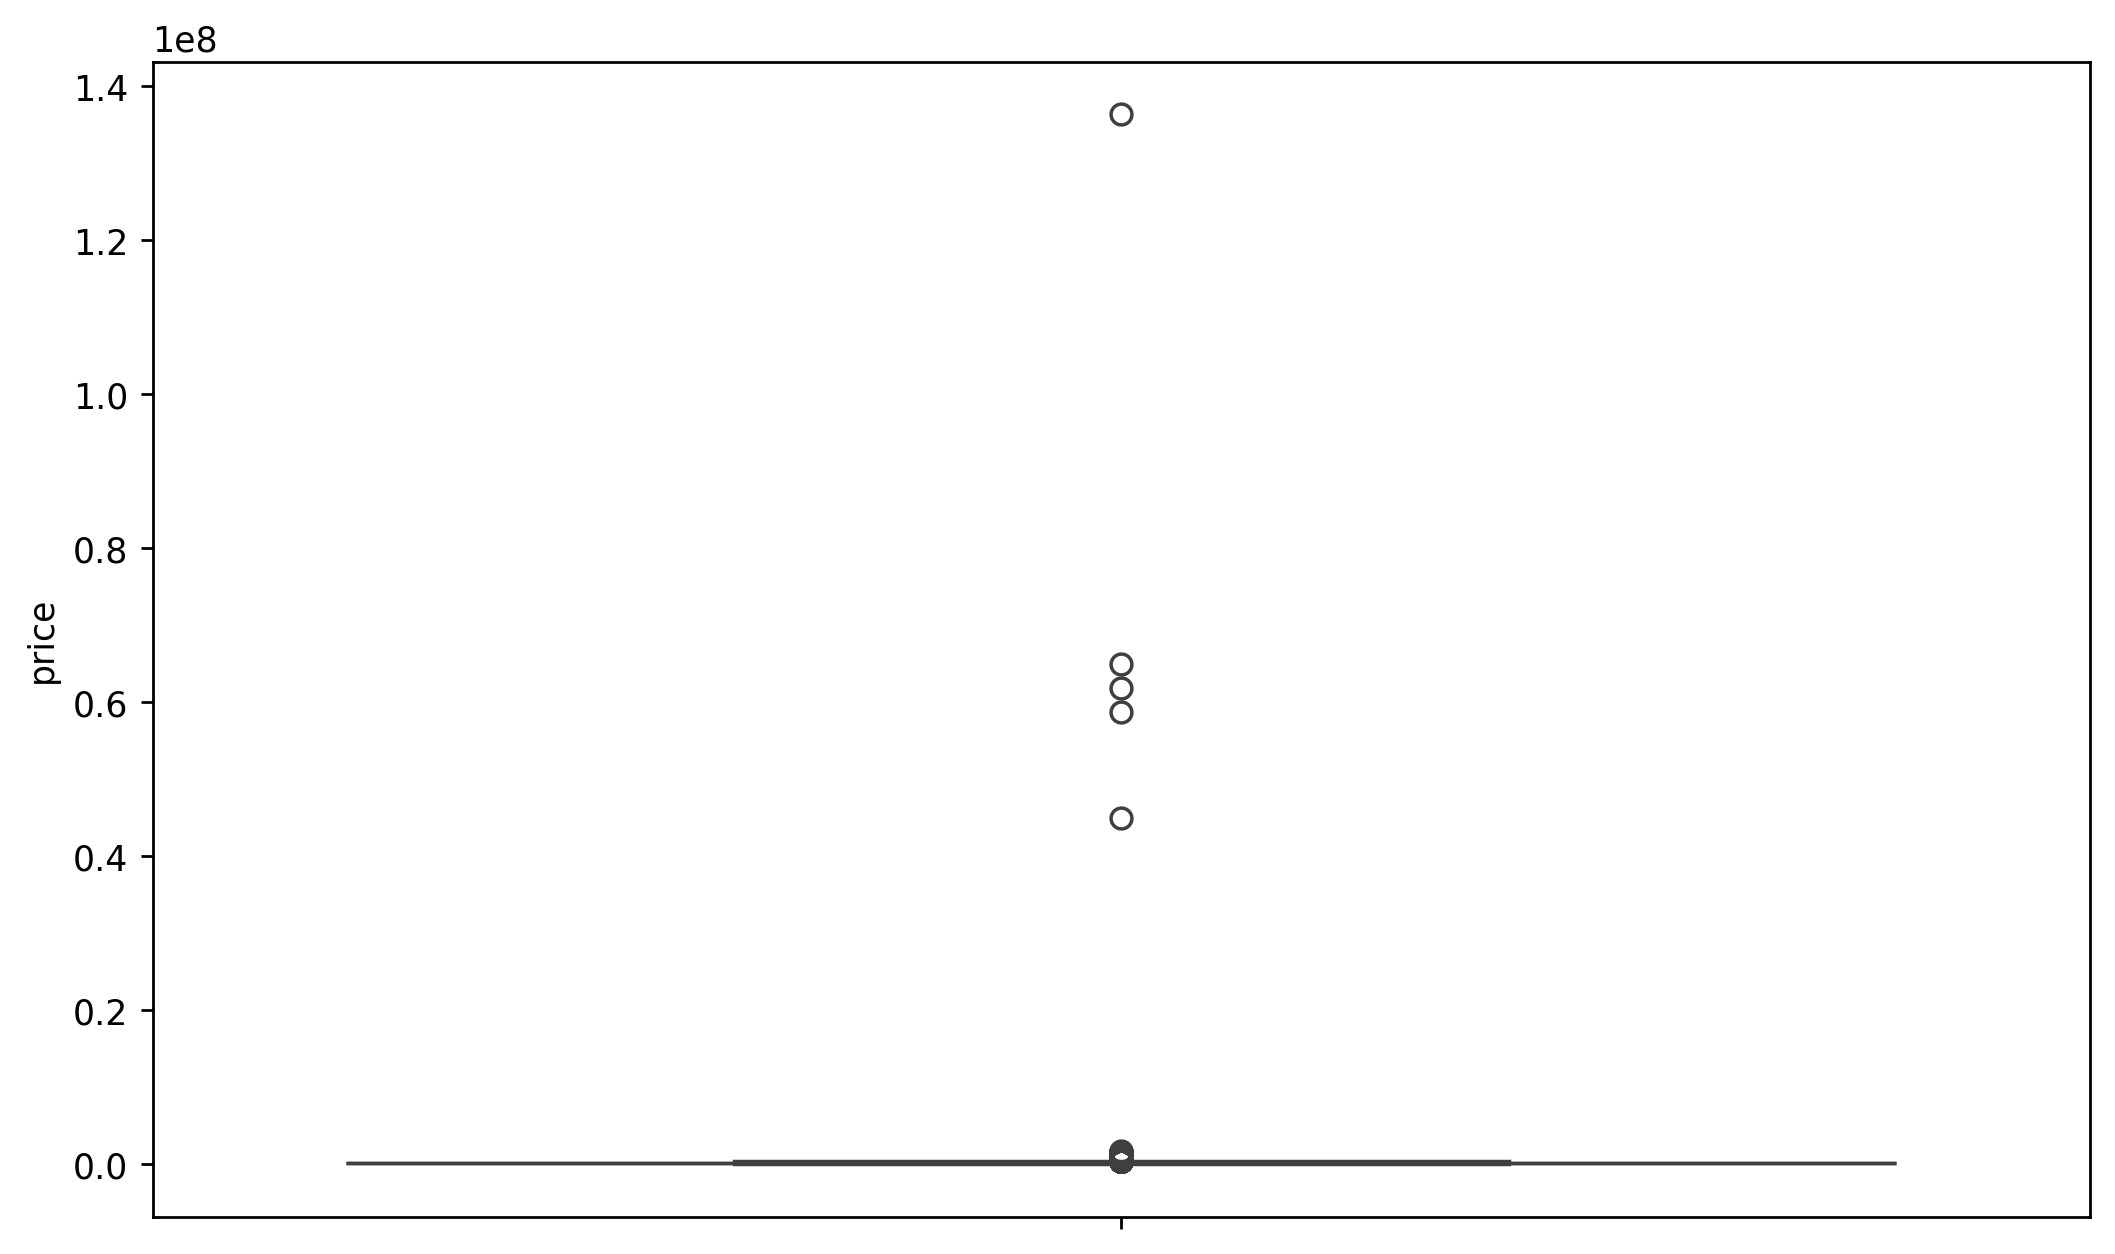

In [334]:
plt.figure(figsize=(10,6), dpi=250)
#df_clean_teszt_vagas = df_clean[(df_clean["price"] > 50000 ) & (df_clean["price"] < 1000000)]
doboz = sns.boxplot(data=df_clean, y="price") 
print(df_clean["price"].sort_values( ascending=False))

,Unnamed: 0,animals,common_cost,condition,date_scraped,description,elevator,energy_certificate,furniture,garden,...,image_urls,location,location_str,price,rooms,size,title,type,url,view_type
1448,https://ingatlan.jofogas.hu/budapest/Kiado_bel...,nem,NaN,újszerű,2018/05/06 15:57,A Parlament és a Szabadság tér közelében kia...,van,NaN,nem,NaN,...,['https://img.jofogas.hu/hdimages/Kiado_belvar...,"(47.5044707, 19.0503985)","Budapest, V. kerület, Belváros, Alkotmány u...",998144.0,4.0,208.0,Kiadó belváros frekventált részén luxus nagypo...,tégla,https://ingatlan.jofogas.hu/budapest/Kiado_bel...,utcai
2285,https://ingatlan.jofogas.hu/budapest/Okoparkba...,nem,NaN,újszerű,2018/05/06 14:22,Kiadó az Ökoparkban ez az amerikai konyhás n...,van,NaN,igen,nem,...,['https://img.jofogas.hu/hdimages/Okoparkban_t...,"(47.5151367, 19.0187187)","Budapest, II. kerület, Szépilona, Budakeszi...",930000.0,5.0,240.0,Ökoparkban teraszos luxus lakás kiadó,tégla,https://ingatlan.jofogas.hu/budapest/Okoparkba...,panoráma
2598,https://ingatlan.jofogas.hu/budapest/V__Belgra...,csak kisebb méretű háziállatok,NaN,felújított,2018/05/06 15:46,"HU: Budapest központjában, az V.kerületben a...",van,NaN,igen,NaN,...,['https://img.jofogas.hu/hdimages/V__Belgrad_r...,"(47.492394, 19.0540338)","Budapest, V. kerület, Belváros, Belgrád kar...",930000.0,4.0,165.0,V. Belgrád rakparton Kiadó 165 m2 Luxus Lakás,tégla,https://ingatlan.jofogas.hu/budapest/V__Belgra...,utcai
2027,https://ingatlan.jofogas.hu/budapest/Kiado_net...,nem,31613.0,újszerű,2018/05/06 14:54,A kiadó 230 m2 hasznos alapterületű luxus vi...,nincs,NaN,igen,NaN,...,['https://img.jofogas.hu/hdimages/Kiado_netto_...,"(47.5029169, 19.0149949)","Budapest, XII. kerület, Kissvábhegy",927450.0,3.0,220.0,Kiadó nettó 230 m2-es penthouse lakás Kisssváb...,tégla,https://ingatlan.jofogas.hu/budapest/Kiado_net...,utcai
1735,https://ingatlan.jofogas.hu/budapest/Kiado_lak...,nem,NaN,felújított,2018/05/06 15:31,"Kiadó lakás, Budapest, 14. kerület , Stefáni...",nincs,NaN,nem,NaN,...,['https://img.jofogas.hu/hdimages/Kiado_lakas_...,"(47.5062795, 19.1038484)","Budapest, XIV. kerület, Istvánmező",904425.0,5.0,389.0,"Kiadó lakás, Budapest, 14. kerület , Stefánia ...",tégla,https://ingatlan.jofogas.hu/budapest/Kiado_lak...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,https://ingatlan.jofogas.hu/budapest/Kivallo_k...,nem,NaN,jó állapotú,2018/05/06 15:34,XIV.Kerületben a Bosnyák Tér közelében kiadó...,nincs,NaN,igen,NaN,...,[None],"(47.5126618, 19.1088199)","Budapest, XIV. kerület, Kiszugló, Bosnyák t...",60000.0,1.0,25.0,Kiválló környék szuper lakás,tégla,https://ingatlan.jofogas.hu/budapest/Kivallo_k...,panoráma
521,https://ingatlan.jofogas.hu/budapest/Corvin_ne...,nem,6300.0,felújított,2018/05/06 15:30,Corvin negyednél az egyetem mellett felújíto...,van,c,nem,nem,...,['https://img.jofogas.hu/hdimages/Corvin_negye...,"(47.4928085, 19.0754838)","Budapest, VIII. kerület, Losonci negyed, Sz...",60000.0,2.0,51.0,Corvin negyednél lakótársat keresek 60000Ft/hó...,panel,https://ingatlan.jofogas.hu/budapest/Corvin_ne...,utcai
474,https://ingatlan.jofogas.hu/budapest/Budapest_...,nem,NaN,jó állapotú,2018/05/06 14:28,"Budapest XX. kerületében, Pestszenterzsébete...",nincs,NaN,nem,igen,...,['https://img.jofogas.hu/hdimages/Budapest_XX_...,"(47.4273393, 19.1119486)","Budapest, XX. kerület, Pacsirtatelep",60000.0,1.0,32.0,Budapest XX. kerületi lakás csendes utcában,tégla,https://ingatlan.jofogas.hu/budapest/Budapest_...,kertre néző
2000,https://ingatlan.jofogas.hu/budapest/Kiado_lak...,csak kisebb méretű háziállatok,5500.0,jó állapotú,2018/05/06 15:55,Kiadó 85 nm es 2 fürdős teakonyhás szuterén ...,nincs,a,igen,nem,...,['https://img.jofogas.hu/hdimages/Kiado_lakas_...,"(47.4797508, 19.0480023)","Budapest, VIII. kerület, Csarnok negyed, Rá...",55000.0,1.0,85.0,Kiadó lakás kaukció nélkül,tégla,https://ingatlan.jofogas.hu/budapest/Kiado_lak...,utcai


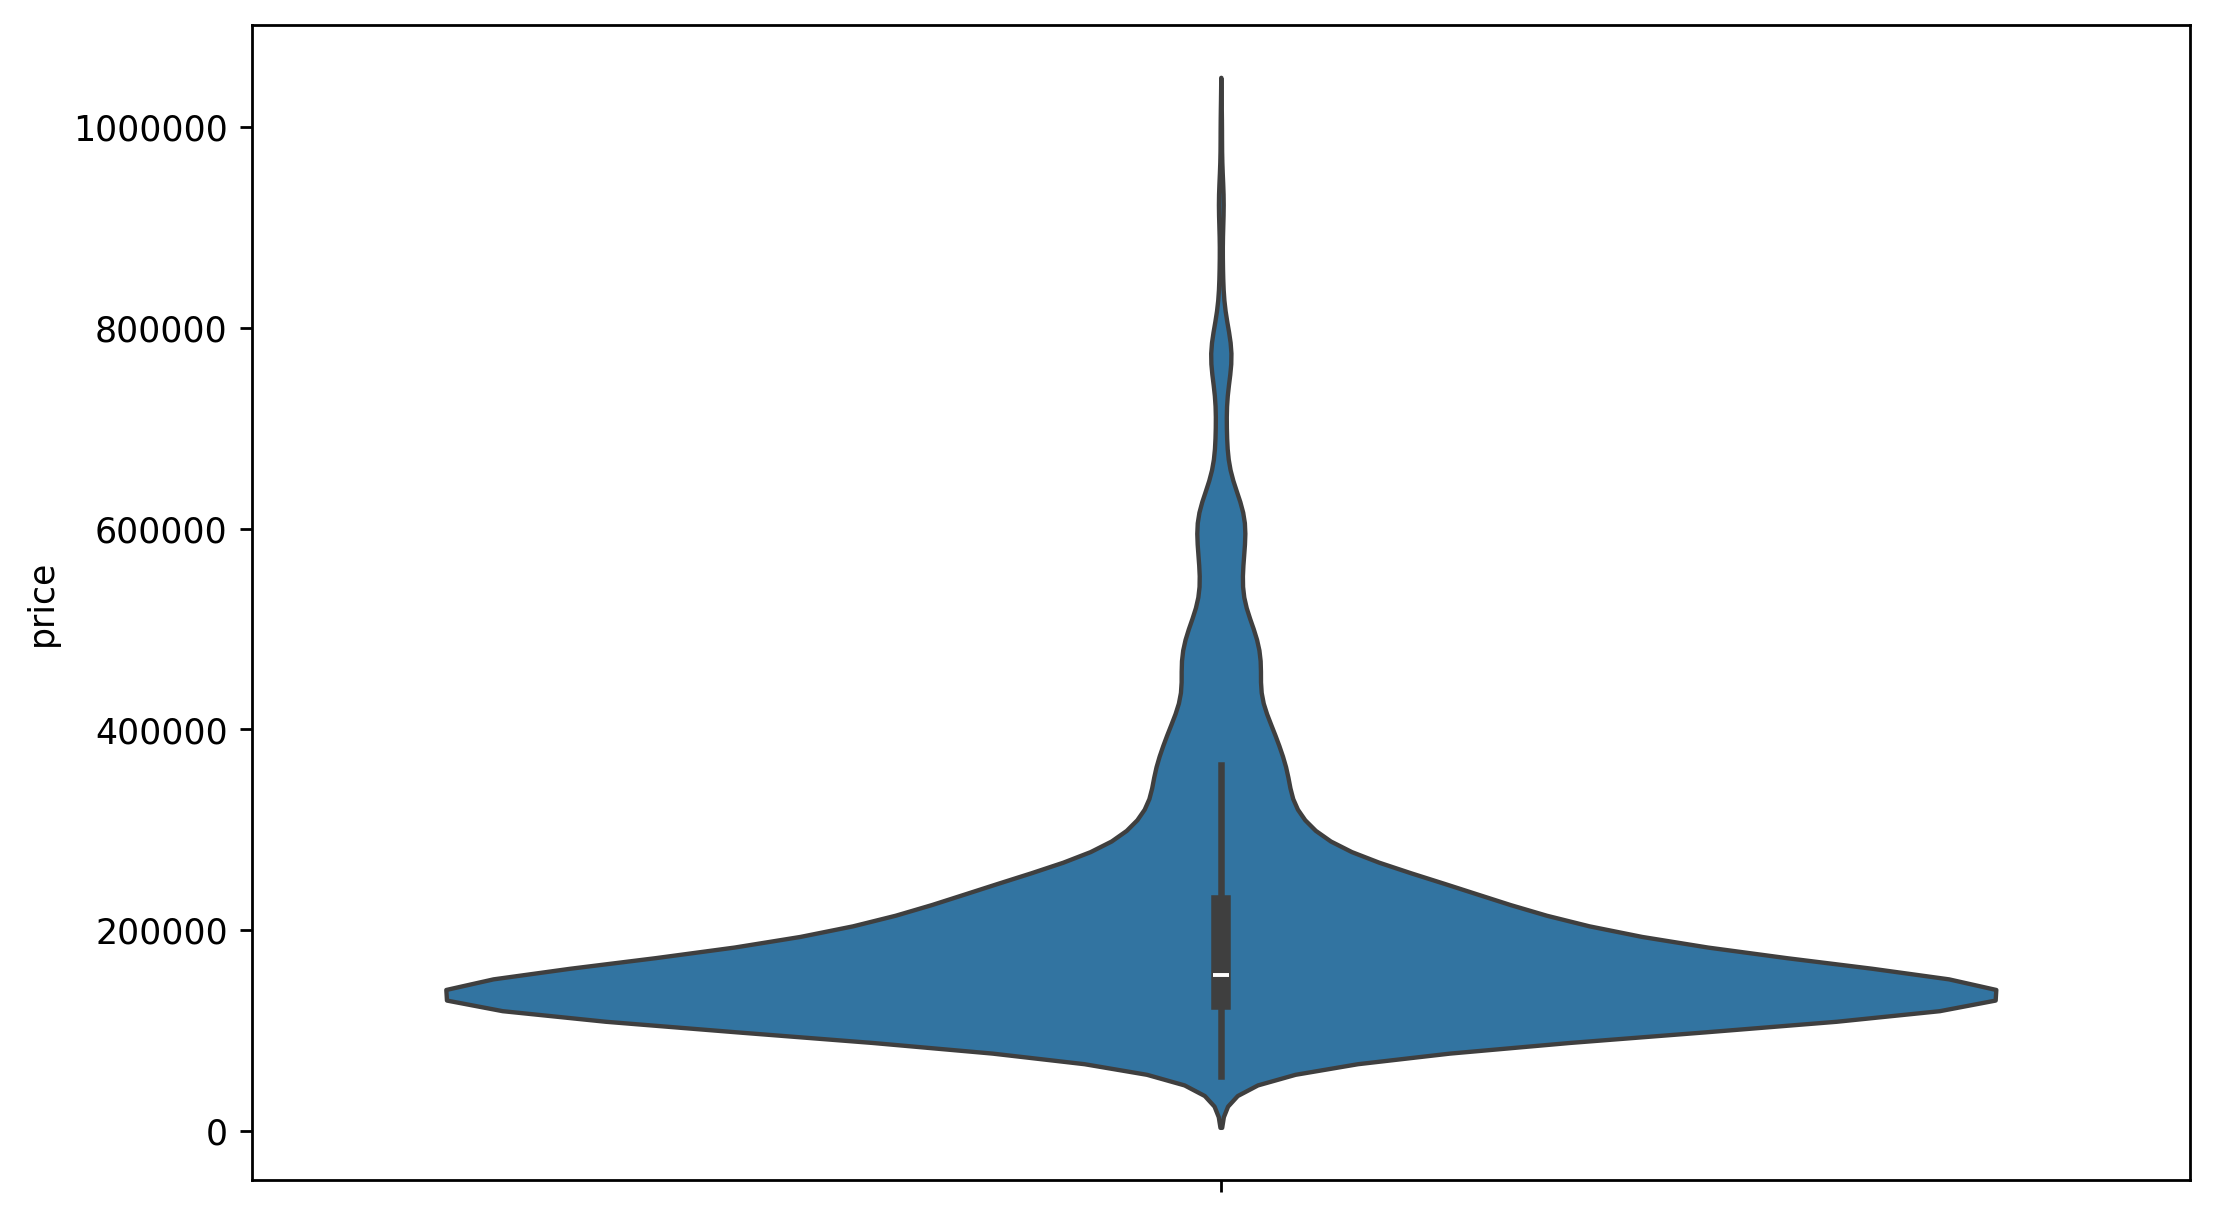

In [335]:
df_clean = df_clean.copy()

plt.figure(figsize=(10,6), dpi=250)
df_clean = df_clean[(df_clean["price"] < 1000000) & (df_clean["price"] > 50000)]
doboz = sns.violinplot(data=df_clean, y="price", ) 
plt.ticklabel_format(style='plain', axis='y')  #ne scientific legyen
df_clean.sort_values(["price"], ascending=False)


In [336]:
df_clean["price"].describe().round()

count      2756.0
mean     201809.0
std      125300.0
min       55000.0
25%      130000.0
50%      155000.0
75%      225000.0
max      998144.0
Name: price, dtype: float64

In [337]:
df_clean["common_cost"] = df_clean["common_cost"].fillna(df_clean["common_cost"].median())
"""
#favágó módszer:
 
df_clean["animals"] = df_clean["animals"].fillna("nincs_megadva")
df_clean["furniture"] = df_clean["furniture"].fillna("nincs_megadva")
df_clean["garden"] = df_clean["garden"].fillna("nincs_megadva")
df_clean["condition"] =df_clean["condition"].fillna("nincs_megadva")
df_clean["energy_certificate"] =df_clean["energy_certificate"].fillna("nincs_megadva")
df_clean["image_folder_name"] = df_clean["image_folder_name"].fillna("nincs_megadva")
df_clean["view_type"] = df_clean["view_type"].fillna("nincs_megadva")
"""

defaults = {
    "animals" : "nincs_megadva",
    "furniture" : "nincs_megadva",
    "garden" : "nincs megadva",
    "condition" : "nincs_megadva",
    "energy_certificate" : "nincs_megadva",
    "image_folder_name" : "nincs_megadva",
    "view_type" : "nincs_megadva"
}

df_clean = df_clean.fillna(defaults)

In [338]:
df_clean.isnull().sum()

Unnamed: 0            0
animals               0
common_cost           0
condition             0
date_scraped          0
description           0
elevator              0
energy_certificate    0
furniture             0
garden                0
heating_type          0
image_folder_name     0
image_urls            0
location              0
location_str          0
price                 0
rooms                 0
size                  0
title                 0
type                  0
url                   0
view_type             0
dtype: int64

In [339]:
print(df_clean["rooms"].unique())

[2. 3. 4. 1. 5.]


Text(0, 0.5, 'Ár (millió ft)')

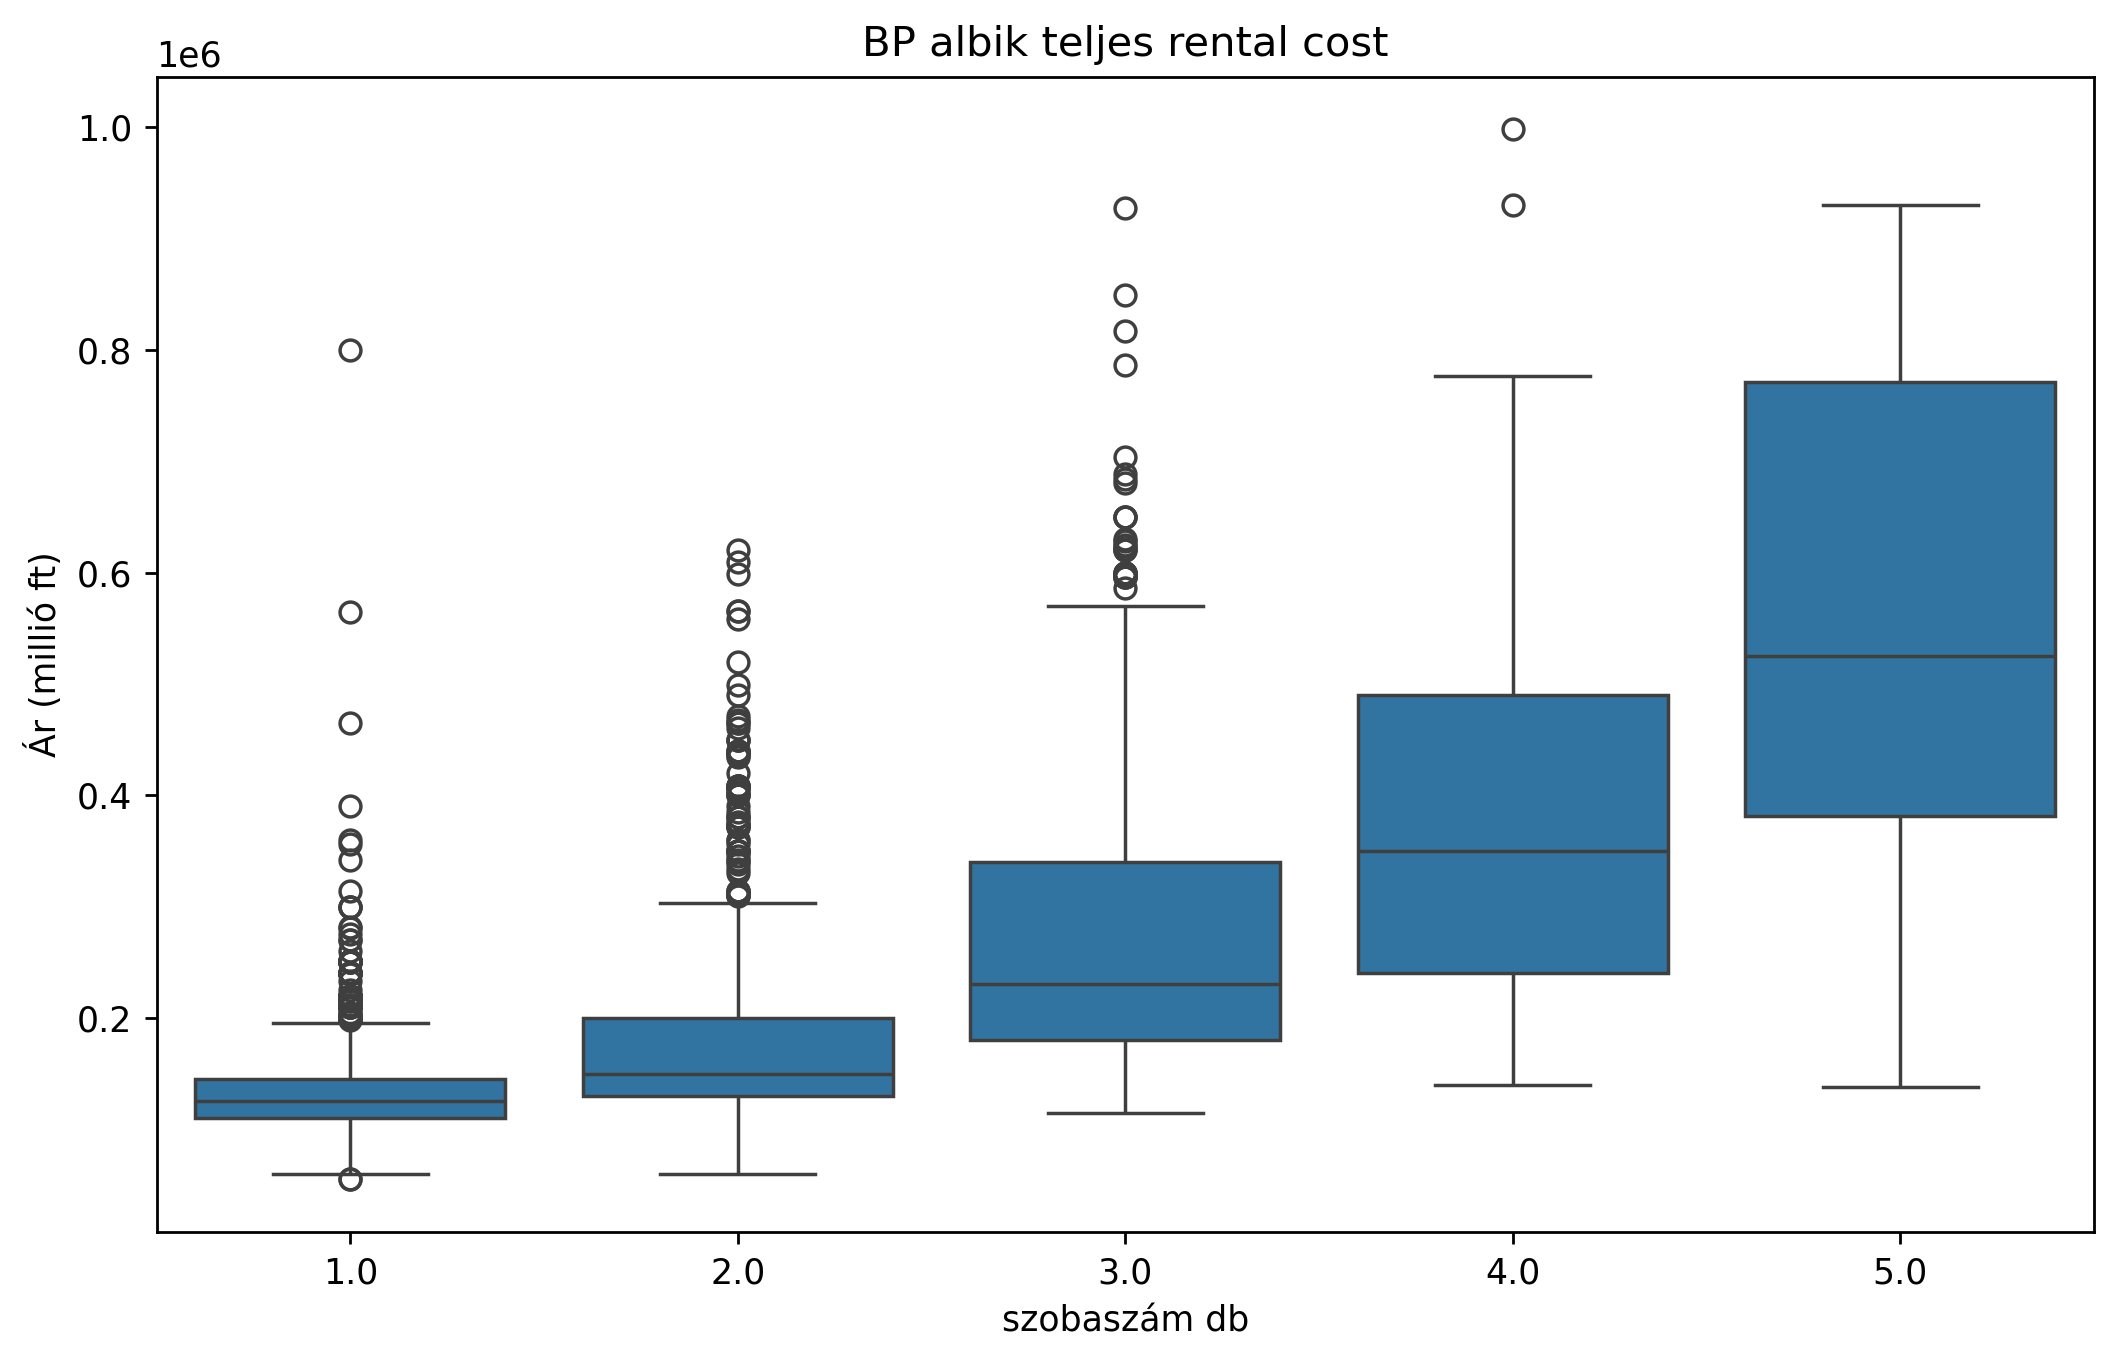

In [340]:
plt.figure(figsize=(10,6), dpi=250)

kilatas = sns.boxplot(data=df_clean, x="rooms", y="price")
plt.title("BP albik teljes rental cost")
plt.xlabel("szobaszám db")
plt.ylabel("Ár (millió ft)")

Text(0, 0.5, 'berleti dij szoba (Ft)')

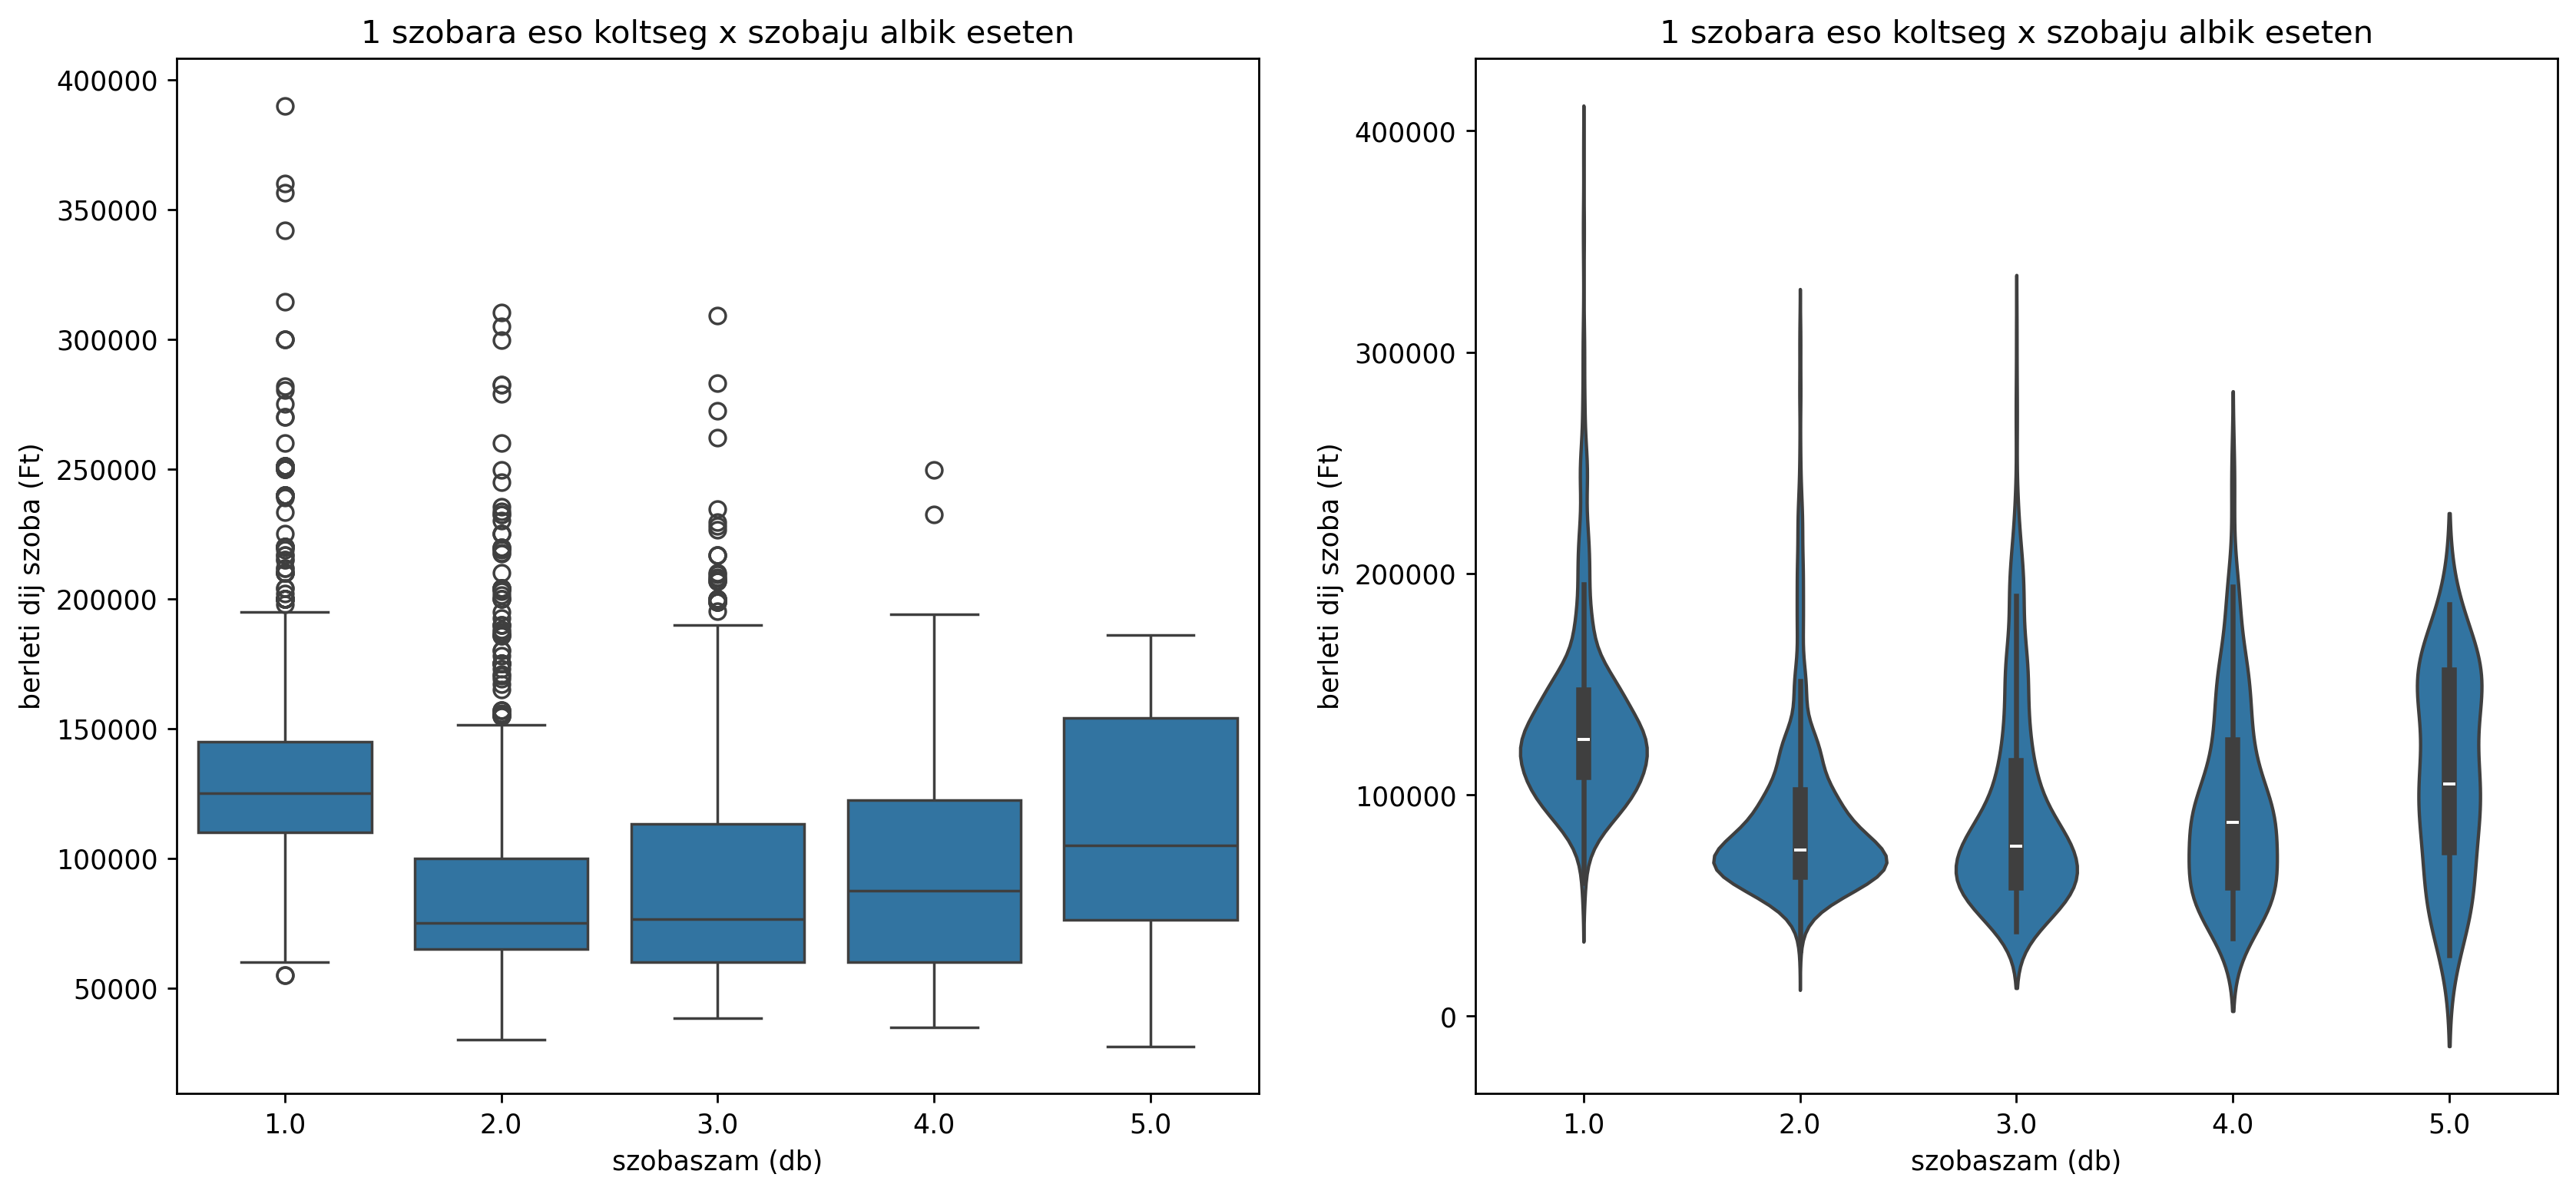

In [348]:
plt.figure(figsize=(16,7), dpi=250)

df_clean["price_per_room"] = (df_clean["price"] / df["rooms"]).round()
df_clean = df_clean[df_clean["price_per_room"] < 400000]


plt.subplot(1,2,1)
szobankent = sns.boxplot(data=df_clean, x="rooms", y="price_per_room")
plt.title("1 szobara eso koltseg x szobaju albik eseten")
plt.xlabel("szobaszam (db)")
plt.ylabel("berleti dij szoba (Ft)")

plt.subplot(1,2,2)

szobankent = sns.violinplot(data=df_clean, x="rooms", y="price_per_room")
plt.title("1 szobara eso koltseg x szobaju albik eseten")
plt.xlabel("szobaszam (db)")
plt.ylabel("berleti dij szoba (Ft)")



In [342]:
print(df_clean.groupby("rooms")["price_per_room"].median())

rooms
1.0    125000.0
2.0     75000.0
3.0     76667.0
4.0     87500.0
5.0    105000.0
Name: price_per_room, dtype: float64


In [343]:
87500/76667

1.141299385654845